In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df=sns.load_dataset("titanic")

In [6]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [9]:
df["age"].isnull().sum()

177

C:\Users\DELL\AppData\Local\Temp\ipykernel_13912\1771108283.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["age"].dropna())


<Axes: xlabel='age', ylabel='Density'>

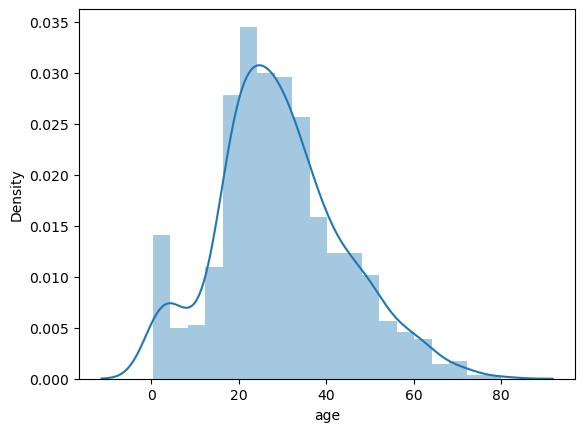

In [11]:
sns.distplot(df["age"].dropna())

C:\Users\DELL\AppData\Local\Temp\ipykernel_13912\1270574887.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["age"].fillna(100))


<Axes: xlabel='age', ylabel='Density'>

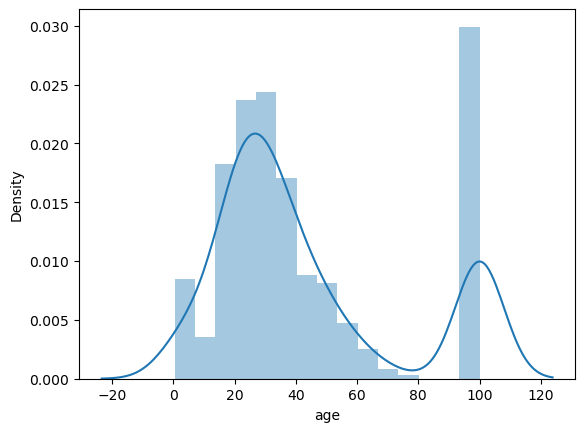

In [12]:
sns.distplot(df["age"].fillna(100))

Text(0, 0.5, 'no of passengers')

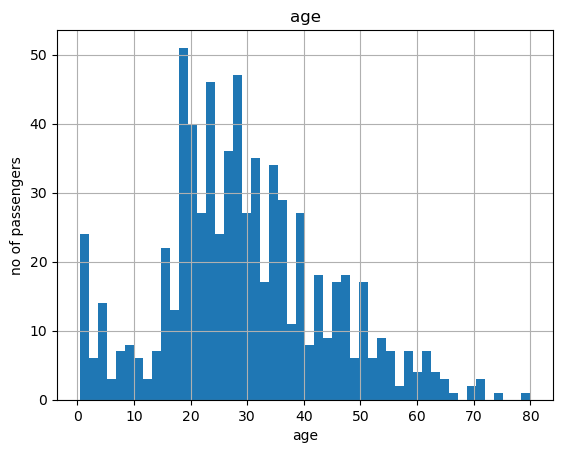

In [15]:
figure=df["age"].hist(bins=50)
figure.set_title("age")
figure.set_xlabel("age")
figure.set_ylabel("no of passengers")
#gaussian distribution

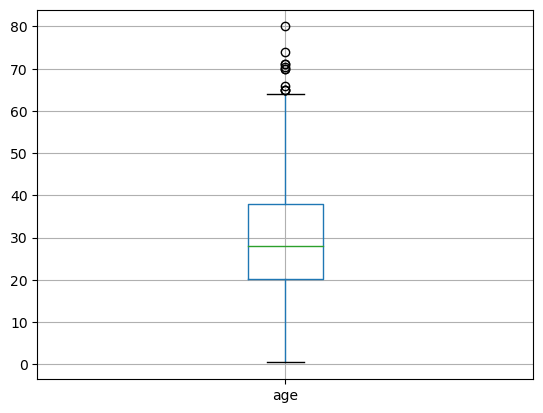

In [16]:
figure=df.boxplot(column="age")

In [17]:
df["age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [37]:
#assuming the age follows the guassian distribution we will calculate the boundaries which differentiate the outliers
# here we follow three standard deviation method
upper_boundary=df["age"].mean()+3*df["age"].std()  # 3rd standard deviation to the right
lower_boundary=df["age"].mean()-3*df["age"].std()  # 3rd standard deviation to the left
upper_boundary 
#for guassian distributed data these steps are enough to follow

73.27860964406095

In [36]:
data=df.copy()

In [39]:
data.loc[data['age']>73,"age"]=73

### feature is skewed

Text(0, 0.5, 'no of passengers')

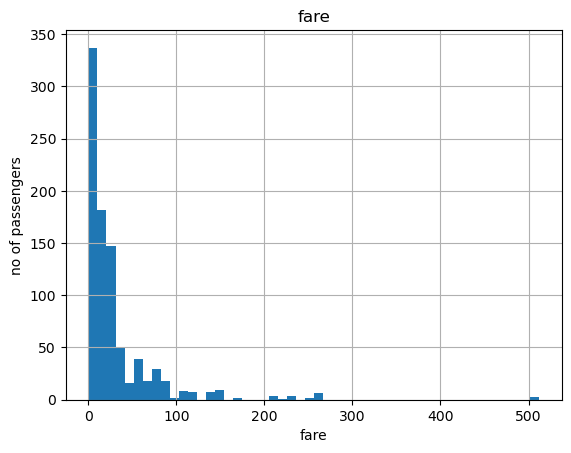

In [29]:
figure=df["fare"].hist(bins=50)
figure.set_title("fare")
figure.set_xlabel("fare")
figure.set_ylabel("no of passengers")
#gaussian distribution

<Axes: >

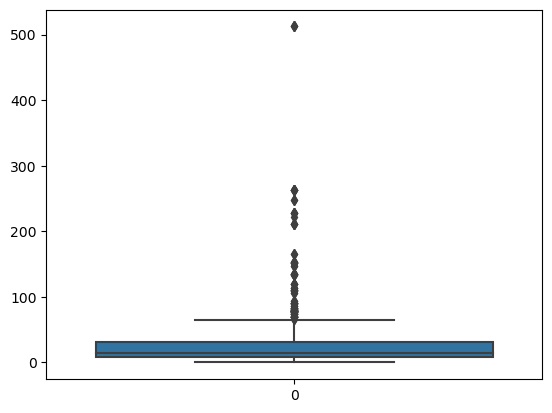

In [30]:
sns.boxplot(df["fare"])

In [31]:
#calculating inter quantile range

IQR=df["fare"].quantile(0.75)-df["fare"].quantile(0.25)

In [35]:
df["fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

In [32]:
lower_bridge=df["fare"].quantile(0.25)-(IQR*1.5)
upper_bridge=df["fare"].quantile(0.75)+(IQR*1.5)
print(lower_bridge,upper_bridge)

-26.724 65.6344


In [34]:
# for extreme outliers
lower_bridge=df["fare"].quantile(0.25)-(IQR*3)
upper_bridge=df["fare"].quantile(0.75)+(IQR*3)
print(lower_bridge,upper_bridge)

-61.358399999999996 100.2688


In [58]:
data.loc[data['fare']>=100,"fare"]=100

Text(0, 0.5, 'no of passengers')

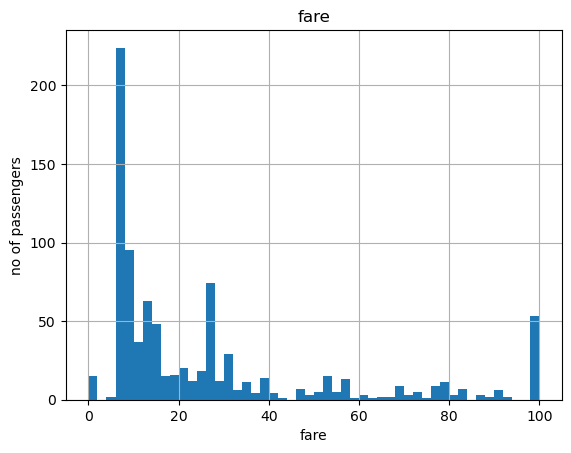

In [59]:
figure=data["fare"].hist(bins=50)
figure.set_title("fare")
figure.set_xlabel("fare")
figure.set_ylabel("no of passengers")
#gaussian distribution

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data[['age','fare']].fillna(0),data["survived"],test_size=0.33)

In [63]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
y_pred1=classifier.predict_proba(x_test)

In [65]:
from sklearn.metrics import accuracy_score,roc_auc_score
print("accuaracy score is {}".format(accuracy_score(y_test,y_pred)))
print('roc_auc_score is {}'.format(roc_auc_score(y_test,y_pred1[:,1])))

accuaracy score is 0.7016949152542373
roc_auc_score is 0.7666861826697893


In [69]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
y_pred1=classifier.predict_proba(x_test)

In [71]:
from sklearn.metrics import accuracy_score,roc_auc_score
print("accuaracy score is {}".format(accuracy_score(y_test,y_pred)))
print('roc_auc_score is {}'.format(roc_auc_score(y_test,y_pred1[:,1])))


accuaracy score is 0.6440677966101694
roc_auc_score is 0.6905493754879
